In [ ]:
# Install yfinance
%pip install yfinance

  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached lxml-5.3.0-cp310-cp310-macosx_10_9_universal2.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached lxml-5.3.0-cp310-cp310-macosx_10_9_universal2.whl (8.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 18.7 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl (11.3 MB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
  Created wheel for peewee: filename=peewee-3.17.9-cp

In [2]:
# Install additional packages
%pip install pandas numpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 24.5 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Retrieve the S&P 500 data of the past 5 years using yfinance
sp500 = yf.Ticker("^GSPC").history(period="5y")

In [6]:
# Drop the 'Dividends' and 'Stock Splits' columns
sp500 = sp500.drop(columns=['Dividends', 'Stock Splits'])

In [7]:
# Let's take a look at the data
sp500.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-31 00:00:00-05:00,6096.790039,6120.910156,6030.930176,6040.529785,4843770000
2025-02-03 00:00:00-05:00,5969.649902,6022.129883,5923.930176,5994.569824,4797210000
2025-02-04 00:00:00-05:00,5998.140137,6042.479980,5990.870117,6037.879883,4410160000
2025-02-05 00:00:00-05:00,6020.450195,6062.859863,6007.060059,6061.479980,4756250000
2025-02-06 00:00:00-05:00,6072.220215,6080.709961,6061.290039,6073.290039,1186371000


In [8]:
# Summary statistics
sp500.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,4310.566671,4335.926702,4283.531817,4311.303332,4.390883e+09
std,790.521793,788.456157,792.839209,790.741197,1.045338e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,1.186371e+09
25%,3850.352417,3879.079956,3816.334961,3851.977600,3.764532e+09
50%,4245.604980,4270.739990,4217.985107,4246.514893,4.140605e+09
75%,4677.804932,4702.527588,4652.467651,4682.917480,4.735215e+09
max,6121.430176,6128.180176,6088.740234,6118.709961,9.976520e+09


In [9]:
# General info
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-02-06 00:00:00-05:00 to 2025-02-06 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [10]:
# Using pandas to calculate the moving average for different time periods
sp500['50ma'] = sp500['Close'].rolling(window=50).mean()
sp500['200ma'] = sp500['Close'].rolling(window=200).mean()

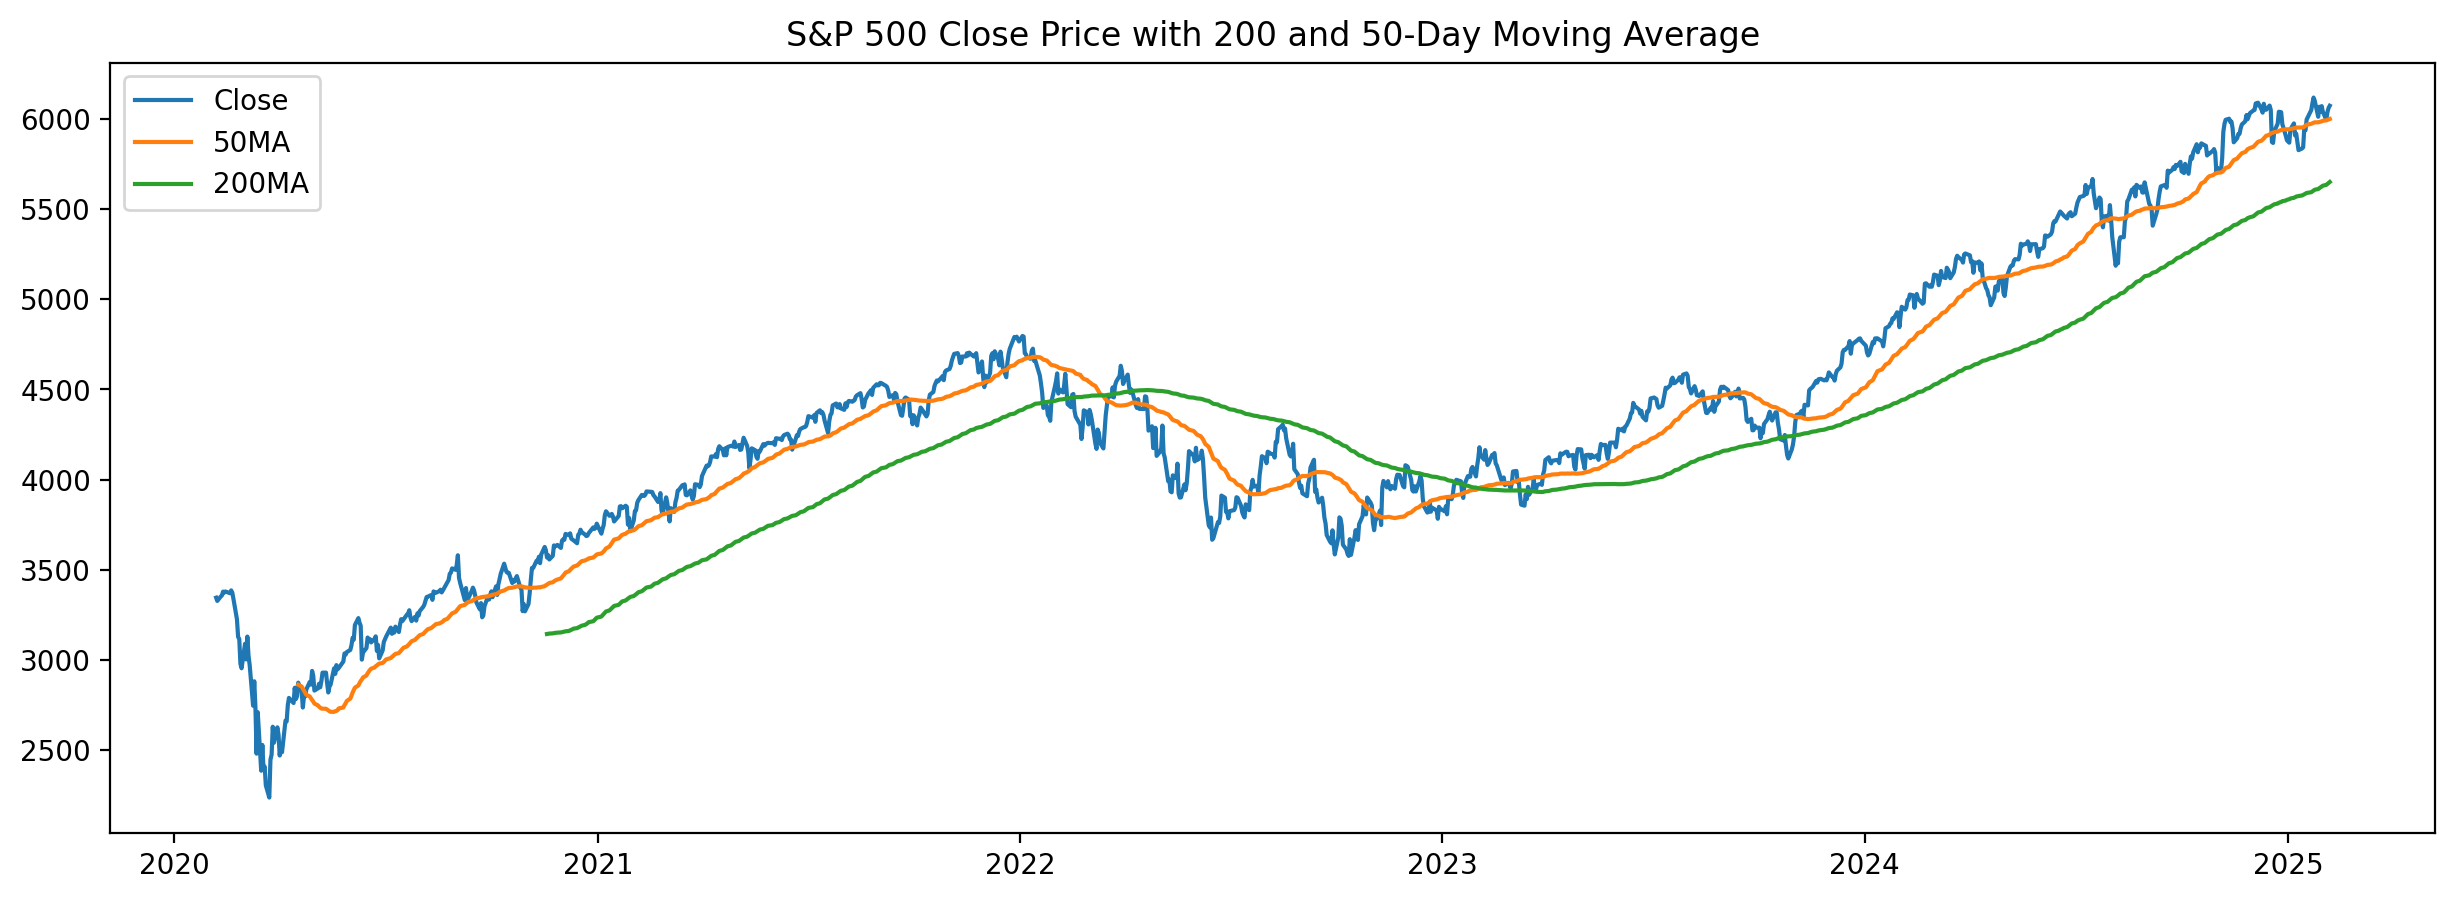

In [11]:
# Plot the data to see the moving averages
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Close Price with 200 and 50-Day Moving Average')
plt.plot(sp500['Close'])
plt.plot(sp500['50ma'])
plt.plot(sp500['200ma'])
plt.legend(['Close', '50MA', '200MA'])
plt.show()

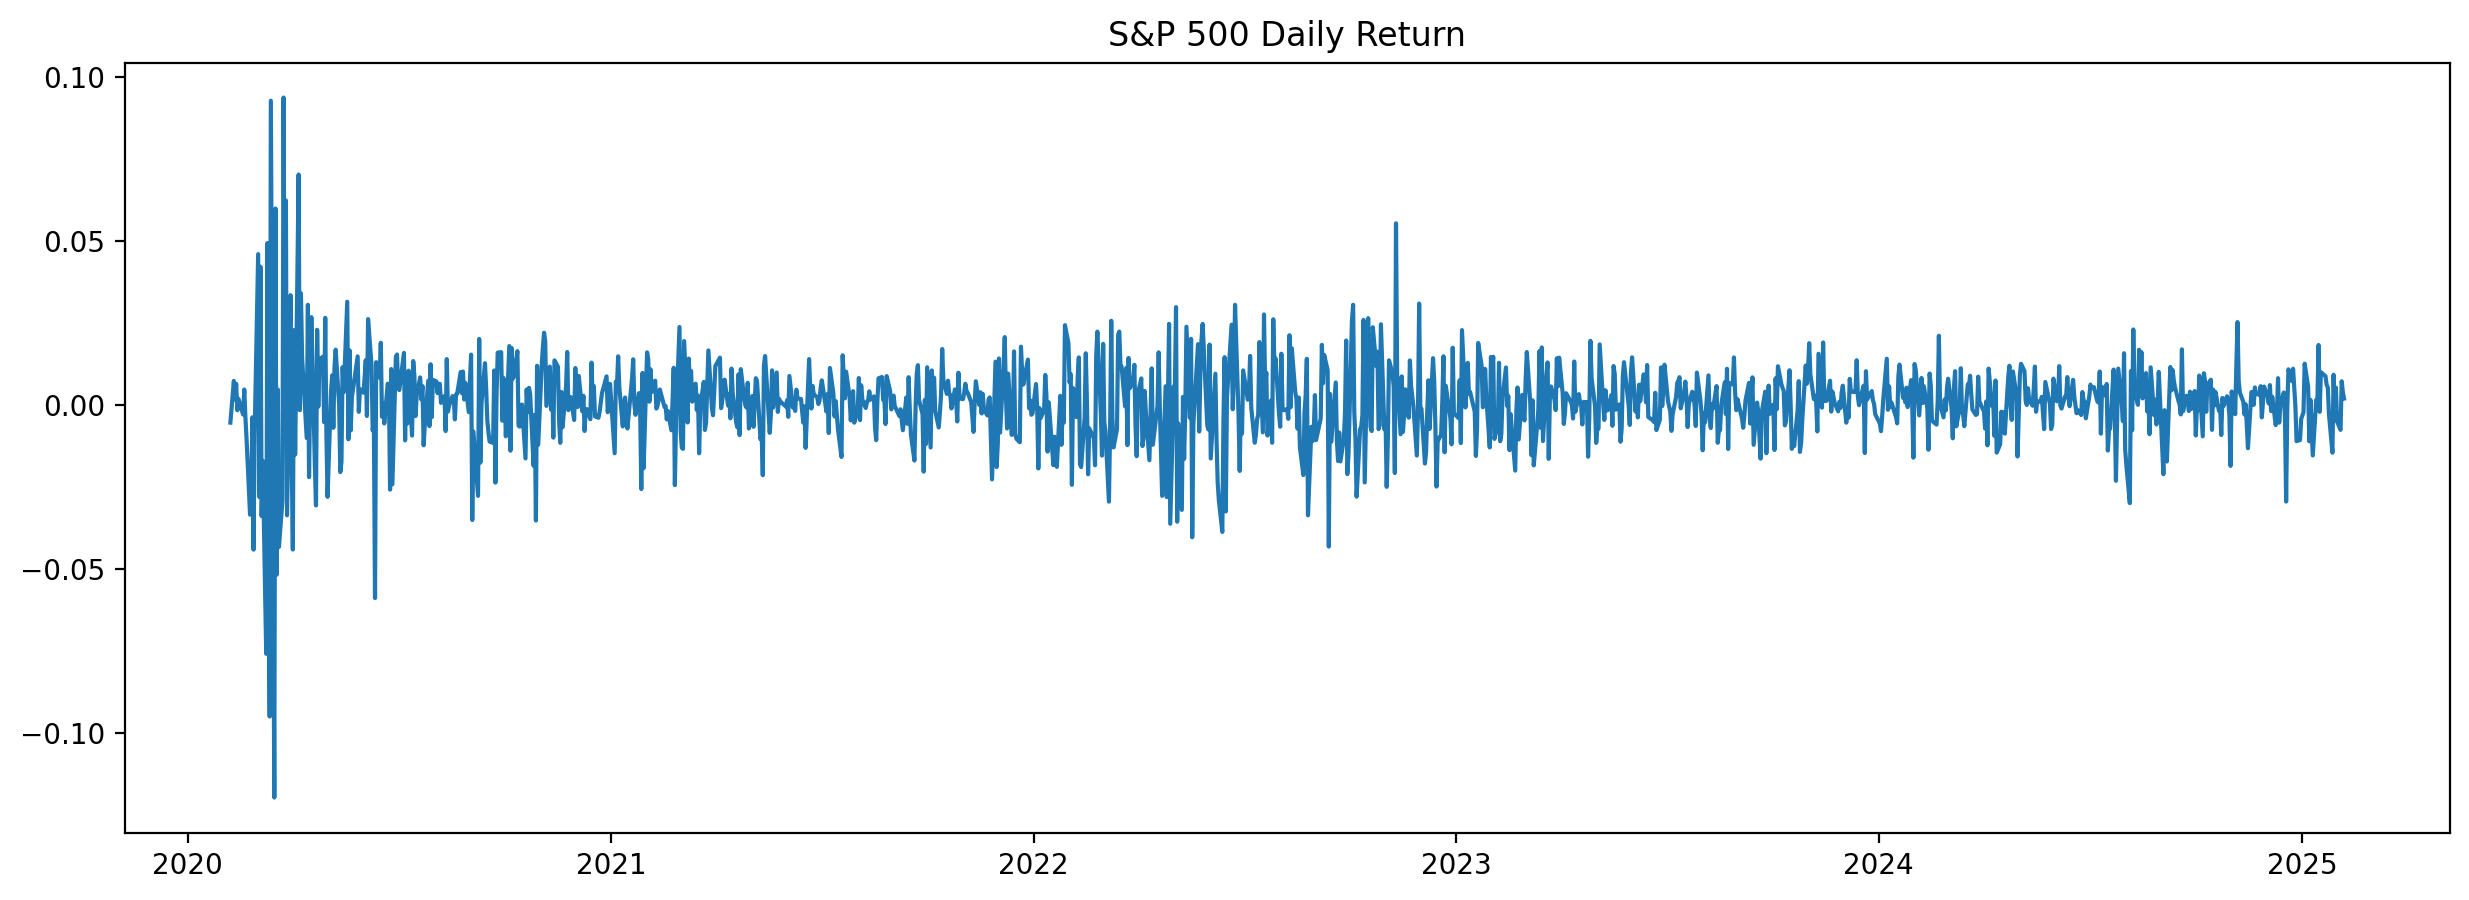

In [12]:
# Calculate the daily return of the close price
sp500['return'] = sp500['Close'].pct_change()

# Plot the daily return
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Daily Return')
plt.plot(sp500['return'])
plt.show()

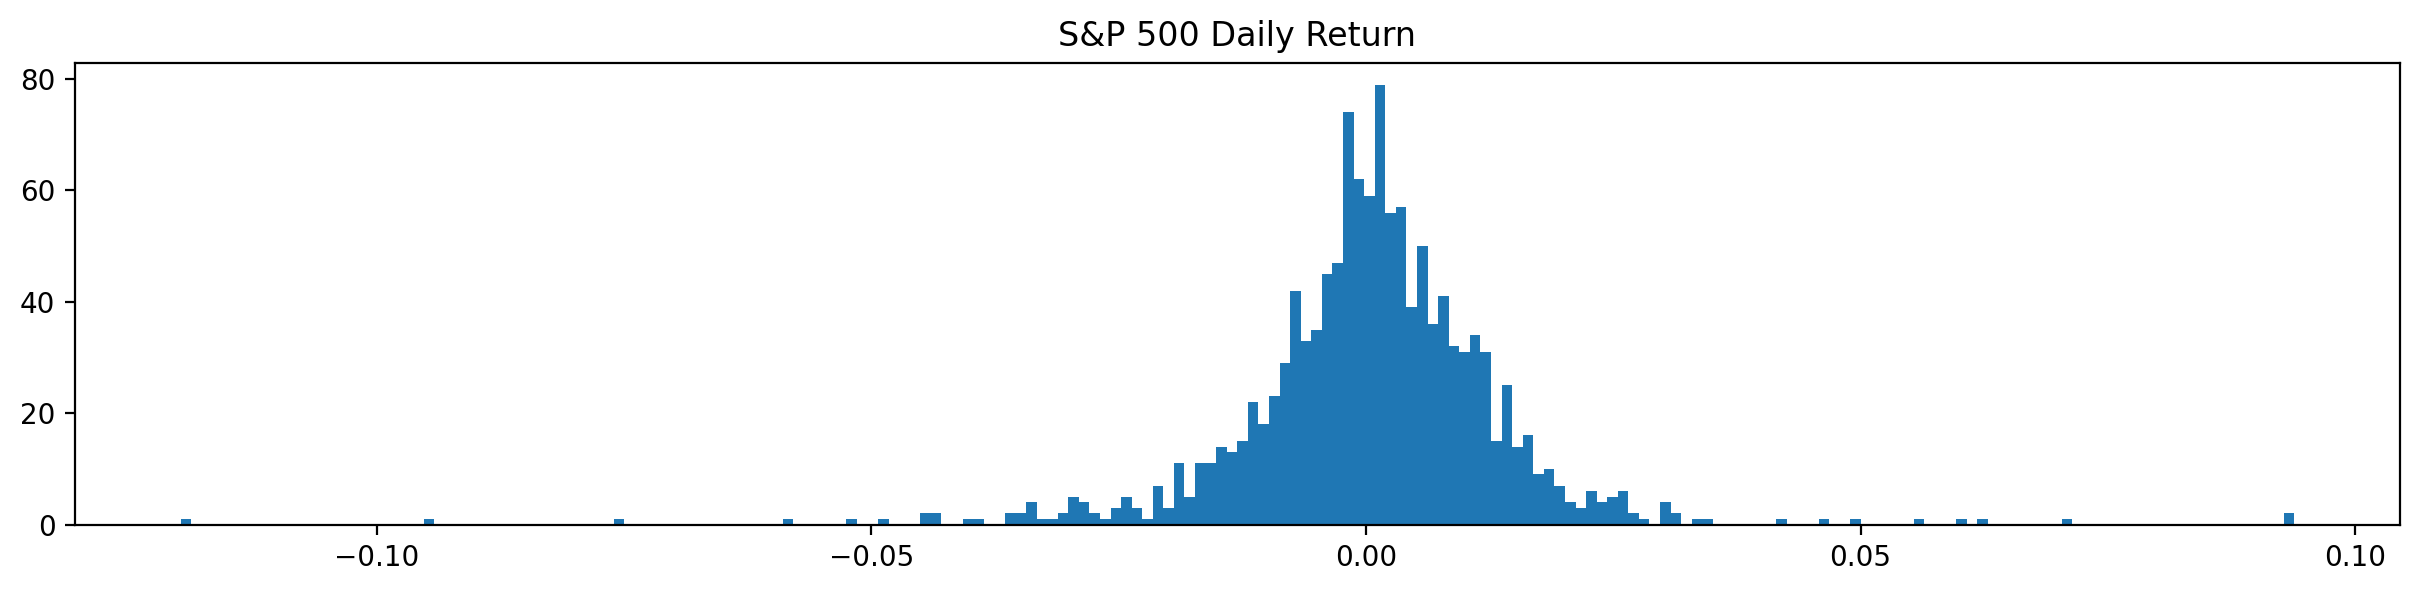

In [13]:
# Plot the daily return using an histogram
plt.figure(figsize=(15, 3))
plt.title('S&P 500 Daily Return')
sp500['return'].hist(bins=200, grid=False)
plt.show()

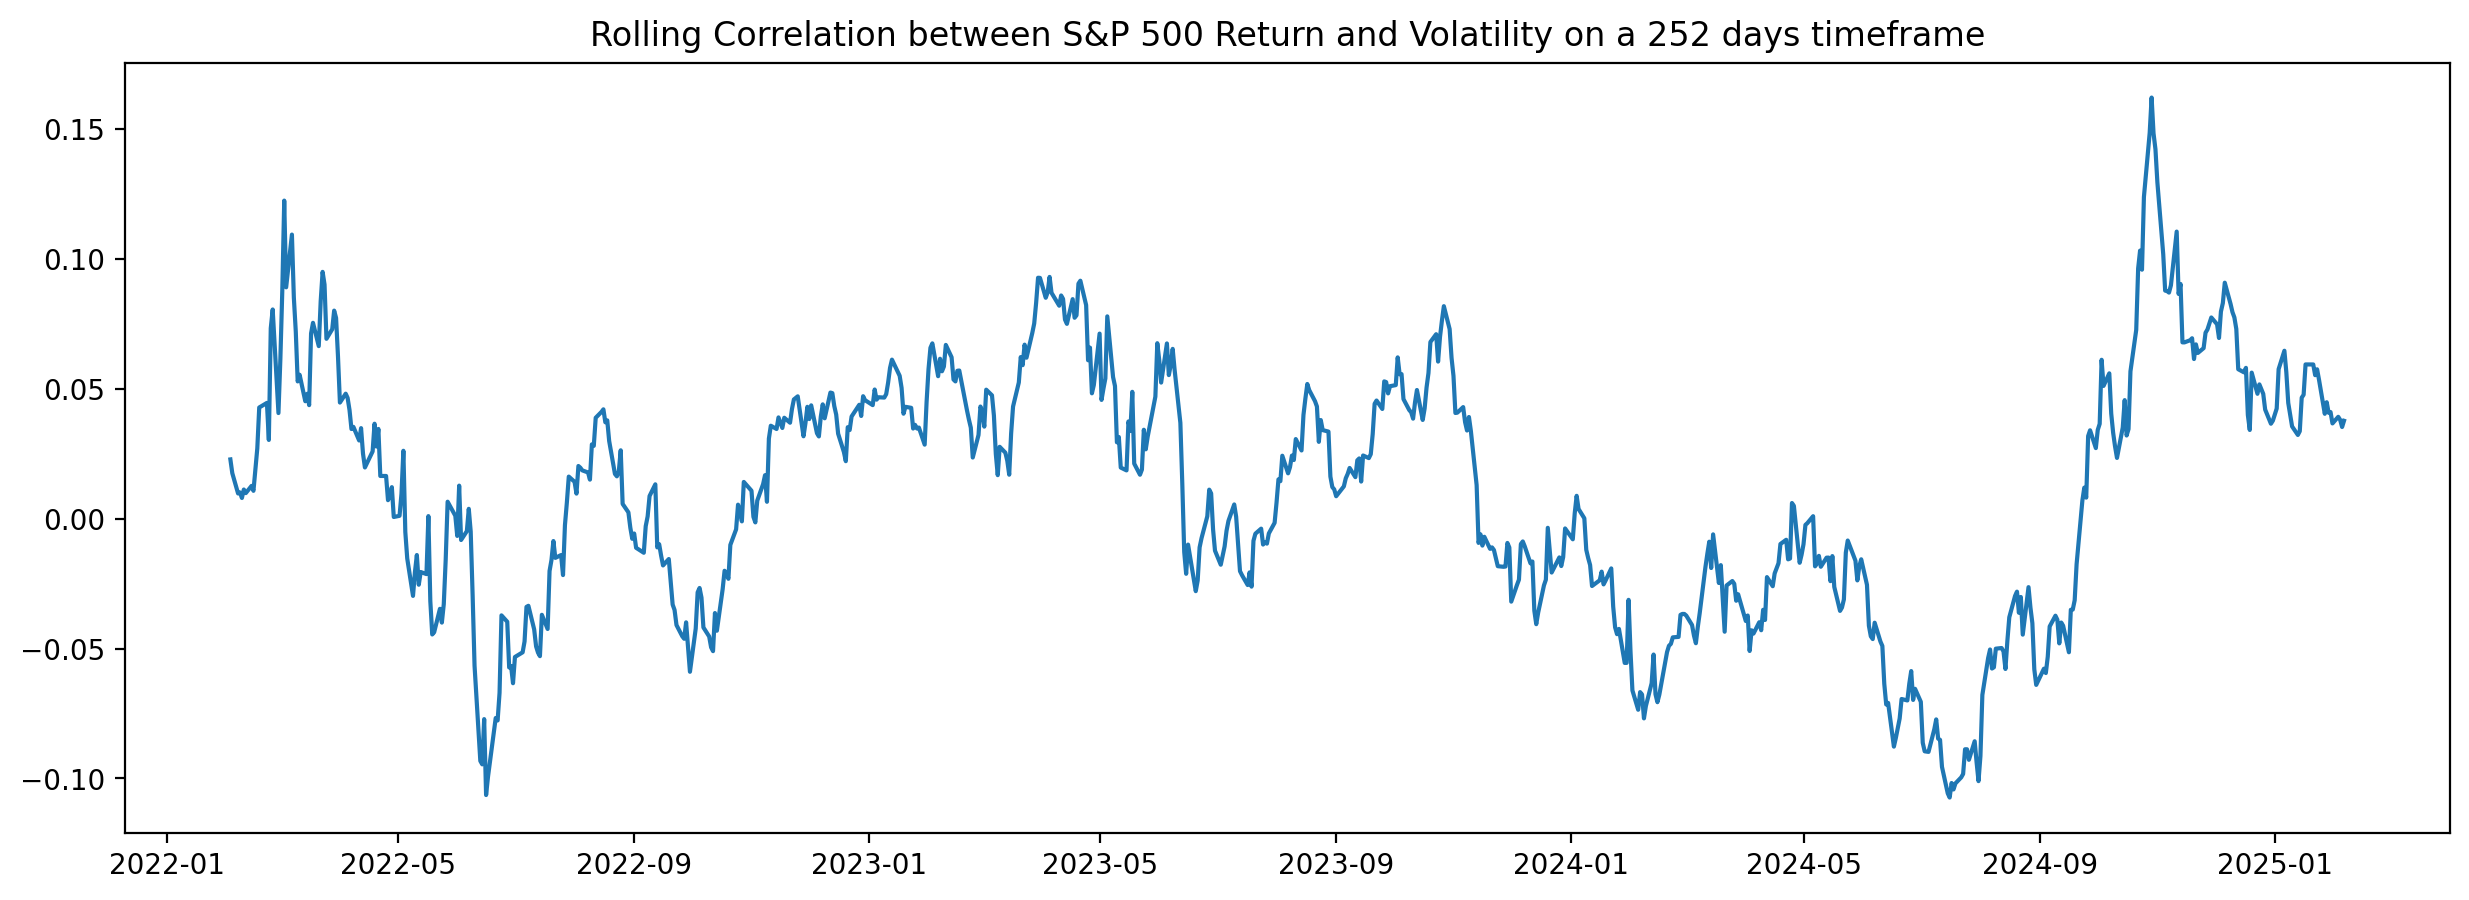

In [14]:
# Calculate the volatility of the close price
sp500['volatility'] = sp500['return'].rolling(window=252).std() * (252 ** 0.5)

# Calculate the rolling correlation between the return and volatility
sp500['corr252'] = sp500['return'].rolling(window=252).corr(sp500['volatility'])

# Plot the rolling correlation
plt.figure(figsize=(15, 5))
plt.title('Rolling Correlation between S&P 500 Return and Volatility on a 252 days timeframe')
plt.plot(sp500['corr252'])
plt.show()

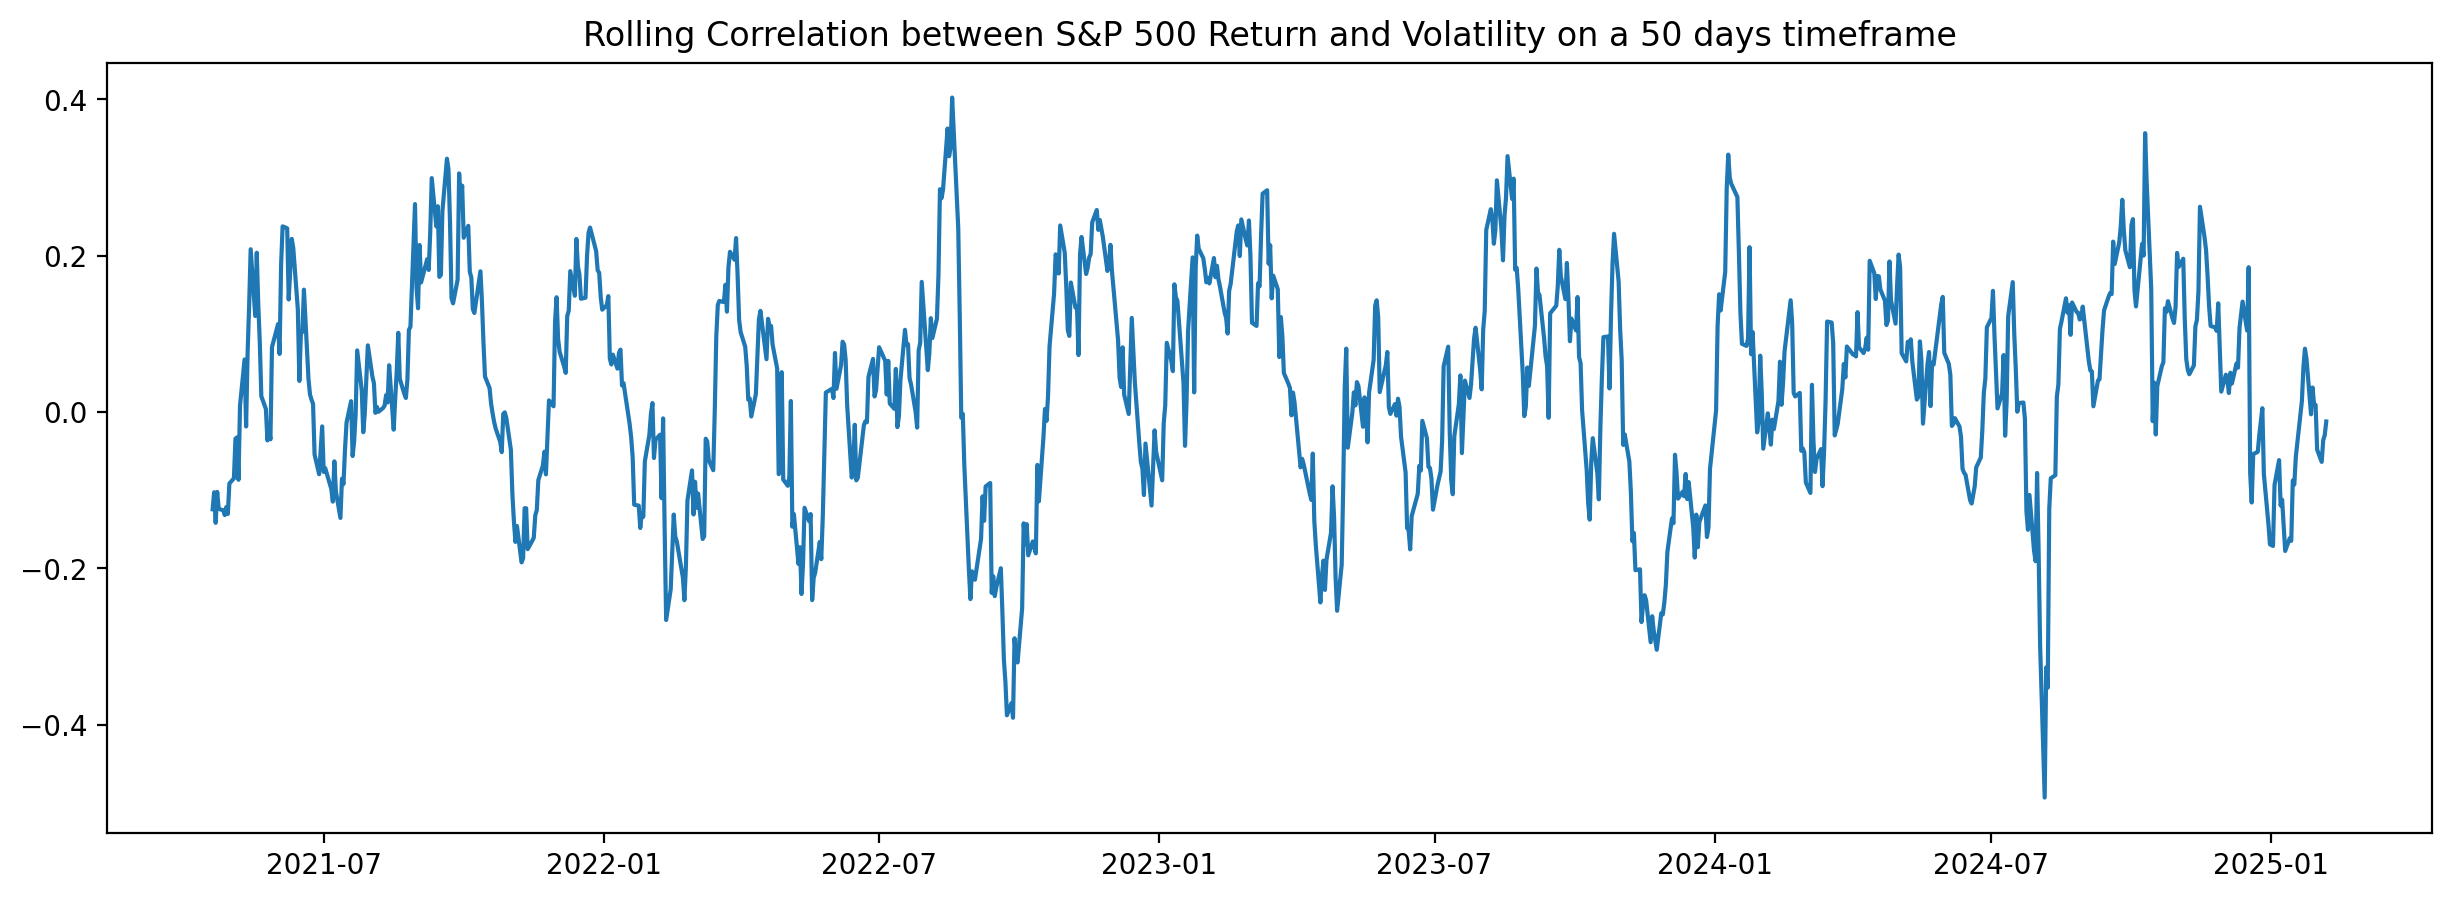

In [15]:
# Calculate the rolling correlation between the return and volatility using a window size of 50 trading days
sp500['corr50'] = sp500['return'].rolling(window=50).corr(sp500['volatility'])

# Plot the rolling correlation
plt.figure(figsize=(15, 5))
plt.title('Rolling Correlation between S&P 500 Return and Volatility on a 50 days timeframe')
plt.plot(sp500['corr50'])
plt.show()